<a href="https://colab.research.google.com/github/zgouyandeh/Feature-Engineering/blob/main/Detect_and_Remove_the_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detect and Remove the Outliers using Python**

Outliers, deviating significantly from the norm, can distort measures of central tendency and affect statistical analyses. The piece explores common causes of outliers, from errors to intentional introduction, and highlights their relevance in outlier mining during data analysis.

The article delves into the significance of outliers in data analysis, emphasizing their potential impact on statistical results.

**What is Outlier?**

An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects. Identifying outliers is important in statistics and data analysis because they can have a significant impact on the results of statistical analyses. The analysis for outlier detection is referred to as outlier mining.

Outliers can skew the mean (average) and affect measures of central tendency, as well as influence the results of tests of statistical significance.

**How Outliers are Caused?**
Outliers can be caused by a variety of factors, and they often result from genuine variability in the data or from errors in data collection, measurement, or recording. Some common causes of outliers are:

* **Measurement errors**: Errors in data collection or measurement processes can lead to outliers.
* **Sampling errors**: In some cases, outliers can arise due to issues with the sampling process.
* **Natural variability**: Inherent variability in certain phenomena can also lead to outliers. Some systems may exhibit extreme values due to the nature of the process being studied.
* **Data entry errors**: Human errors during data entry can introduce outliers.
* **Experimental errors**: In experimental settings, anomalies may occur due to uncontrolled factors, equipment malfunctions, or unexpected events.
* **Sampling from multiple populations**: Data is inadvertently combined from multiple populations with different characteristics.
Intentional outliers: Outliers are introduced intentionally to test the robustness of statistical methods.

## **Outlier Detection And Removal**
Here pandas data frame is used for a more realistic approach as real-world projects need to detect the outliers that arose during the data analysis step, the same approach can be used on lists and series-type objects.

**Dataset Used For Outlier Detection**

In this example we will use a dataset containing average IQ found on Kaggle. To detect outliers we can do some rare :

In [3]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zgouyandeh","key":"88d5f7b7a87ce1d97162dc7dcfb380d5"}'}

In [5]:
! kaggle datasets download rizal1015/iq-and-gender

Dataset URL: https://www.kaggle.com/datasets/rizal1015/iq-and-gender
License(s): unknown
  0% 0.00/817 [00:00<?, ?B/s]
100% 817/817 [00:00<00:00, 1.39MB/s]


In [7]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("iq-and-gender.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [10]:
import pandas as pd
df=pd.read_csv('/content/IQ GPA and Gender.csv')
df.head()

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


## **How do you Detect Outliers?**

1.**Data Visualization:**
Graphical methods like Scatter Plots, Box Plots, and histograms can help identify outliers.


*  **Visualizing and Removing Outliers Using Box Plot**

It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

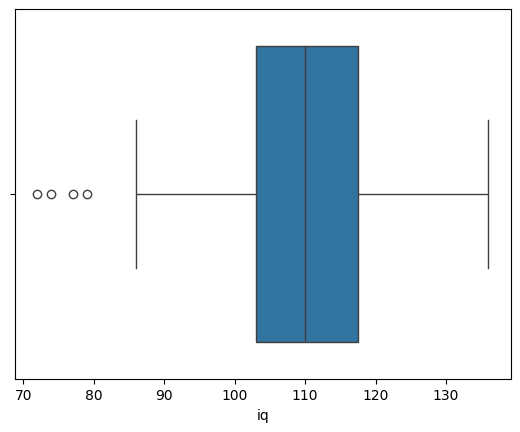

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from scipy import stats

sns.boxplot(data=df, x="iq")
plt.show()

The boxplot divides into 3 parts namely Q1, Q2, and Q3 where data smaller than Q1 or larger than Q3 can be categorized as outliers.

* **Visualizing and Removing Outliers Using Scatterplot**

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

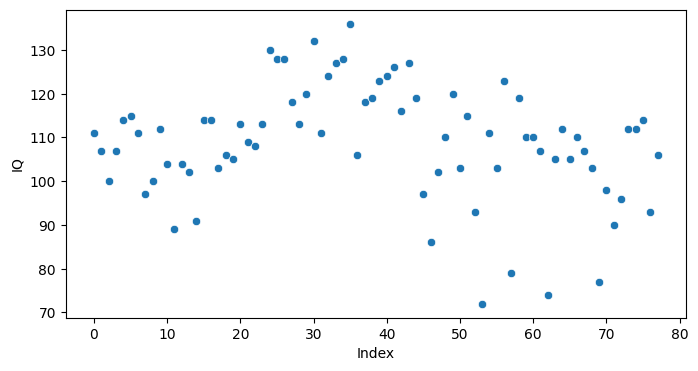

In [12]:
# Buat scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df.index, y=df["iq"])

# Atur label sumbu
plt.xlabel("Index")
plt.ylabel("IQ")

# Tampilkan plot
plt.show()

Scatter plots are used to observe the distribution of the data and numbers that have positions outside the distribution can be referred to as outliers. However, in the above case, it seems that the scatter plot is not clear enough to identify outliers.

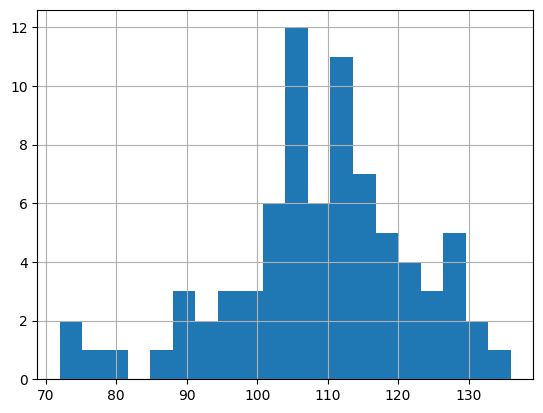

In [13]:
df["iq"].hist(bins=20)
plt.show()

Boxplots can also be used to visually detect whether there are outliers in the data. In this case, there is a range of data between 70–80 that could potentially be outliers.

Visual observation is enough to help us detect outliers, but after observing through visual observation we certainly have to validate so that the data suspected as outliers is truly valid.

**2. Interquartile Range (IQR) Method**

The $IQR$ is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. Any data point that falls below $Q1–1.5*IQR$ or above $Q3 + 1.5*IQR $ can be classified as an outlier.

In [16]:
columns = ['iq']
outlier_percentage = {}

for column in columns:
    column_data = df[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}':{percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")

Count of outliers in column 'iq': 4
Percentage of outliers in column 'iq':5.13%

Lower : 81.25
Upper : 139.25

Data Outlier': [72 79 74 77]


From the results of checking outliers using the IQR method, 5.13% of the data is categorized as Outliers. The lower limit is 81.25 and the upper limit is 139.25, the outliers found are data that are in the position below the lower limit.

**Other ways to detect Outlier**

There are several methods to detect outliers other than using the IQR method, but to use other methods we need to have data with a normal distribution. If the distribution is not normal, the IQR method is the best. But if the distribution is normal we can use the z-score method.


* **Z-score**
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

$$
Zscore = \frac{(data_{point} -mean)}{ std.deviation}
$$

In this example, we are calculating the Z scores for the ‘age’ column in the DataFrame df_diabetics using the zscore function from the SciPy stats module. The resulting array z contains the absolute Z scores for each data point in the ‘age’ column, indicating how many standard deviations each value is from the mean.

In [17]:
# New Dataset, Data with Normal Distribution
# Mean andstandar deviasi
mean_iq = 100
std_dev_iq = 15

# Create dataset with normal distribution
np.random.seed(0)
data_iq = np.random.normal(mean_iq, std_dev_iq, 1000)

# Create DataFrame fromdata
new_df = pd.DataFrame(data_iq, columns=['IQ'])

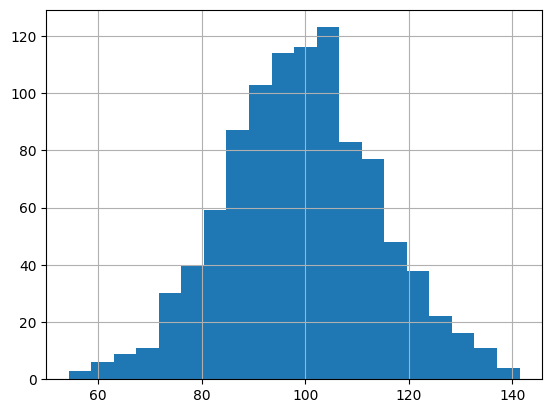

In [18]:
new_df["IQ"].hist(bins=20)
plt.show()

In [19]:
# Calculate Z-score
z_scores = zscore(new_df['IQ'])

# Absolute value from Z-score > 3
batas_atas = new_df['IQ'].mean() + 3*new_df['IQ'].std()
batas_bawah = new_df['IQ'].mean() - 3*new_df['IQ'].std()

# show upper and lower
print("Upper: ", batas_atas)
print("Lower: ", batas_bawah)

# outlier
outliers = np.where(np.abs(z_scores) > 3)

# show outlier
print("Outlier: ", np.array(new_df['IQ'].iloc[outliers]))

Upper:  143.75986644390017
Lower:  54.88243233139401
Outlier:  [54.30785418]


With the Z-Score method we can also determine the upper and lower limits, and in the case above we found 1 outlier that is below the lower limit.

**How Should We Handle Outliers in Our Data?**
There are several methods to handle outliers, namely:

* **Removal**, if you believe the outliers are caused by errors or are irrelevant to your analysis then this is the right method. but you should also consider how much data to remove and how much it affects your data.
* **Imputation** is a technique used to fill in values that are considered outliers with other values. Usually, the outlier value is replaced with the median, mean, or mode value.

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

* **Removal of Outliers with Z-Score**

Let’s remove rows where Z value is greater than 2. In this example, we sets a threshold value of 2 and then uses NumPy’s np.where() to identify the positions (indices) in the Z-score array z where the absolute Z score is greater than the specified threshold (2). It prints the positions of the outliers in the ‘age’ column based on the Z-score criterion.

### **Remove Outlier**

In [20]:
columns = ['iq']

for column in columns:
    column_data = df[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # find outlier
    outliers = column_data[(column_data < lower) | (column_data > upper)]

    # remove outlier
    df_no_outliers = df[(column_data >= lower) & (column_data <= upper)]

In [21]:
columns = ['iq']
outlier_percentage = {}

for column in columns:
    column_data = df_no_outliers[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}':{percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")

Count of outliers in column 'iq': 0
Percentage of outliers in column 'iq':0.00%

Lower : 83.0
Upper : 139.0

Data Outlier': []


After removing the outliers, we check again whether there are still outliers or not. The results above show that there are no more outliers in the data.

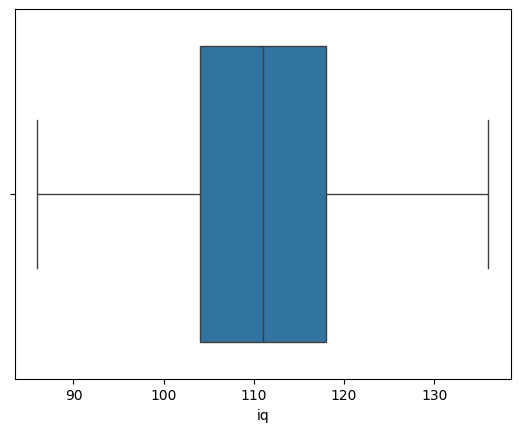

In [22]:
sns.boxplot(data=df_no_outliers, x="iq")
plt.show()

The boxplot above shows that there are no more outlier data outside the lower and upper limits of the data.

### **Imputation Outlier**

In [23]:
df_median = df.copy()

for column in columns:
    column_data = df_median[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # find outlier
    outliers = column_data[(column_data < lower) | (column_data > upper)]

    # calculate median
    median = column_data.median()

    # replace outlier withmedian
    column_data[(column_data < lower) | (column_data > upper)] = median

<ipython-input-23-8f5c770b8457>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_data[(column_data < lower) | (column_data > upper)] = median


In [24]:
columns = ['iq']
outlier_percentage = {}

for column in columns:
    column_data = df_median[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}':{percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")

Count of outliers in column 'iq': 0
Percentage of outliers in column 'iq':0.00%

Lower : 84.375
Upper : 137.375

Data Outlier': []


In this method, outliers are not removed, but the value is replaced with the median number. The total data will remain the same, but there are no more outliers.

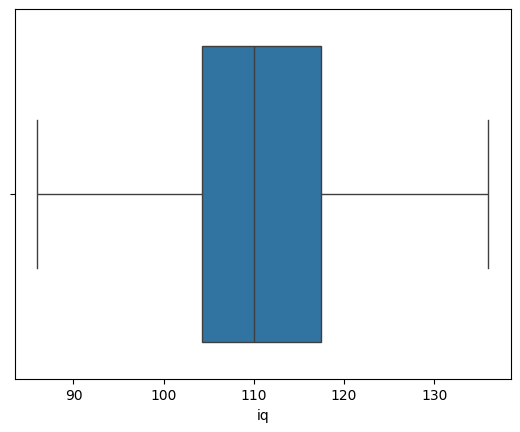

In [25]:
sns.boxplot(data=df_median, x="iq")
plt.show()

Visually using the boxplot, there are also no more outliers.

### **Conclusion**
Checking outliers is a mandatory method before analyzing data because outliers can give results that are quite different from data without outliers. To detect outliers in data, we can use the Data visualization method, IQR for data with abnormal distribution, and the Z-Score method for data with normal distribution. After successfully detecting outliers, we have the option to delete or replace the outlier data. If the data is caused by inputting errors, it is recommended to delete the outliers. Considering the number of outliers is also very important, if the outliers are large enough of the total data then removing them may reduce the significance of the data and may lead to less robust analysis results. The option of replacing the data with mean, median, and mode values could be a better choice.

